<a href="https://colab.research.google.com/github/29kirti/Deepfake-video-detection-using-custom-CNN/blob/main/deepfake_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/processed/fake', exist_ok=True)
os.makedirs('/content/drive/MyDrive/processed/real', exist_ok=True)


In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import UnidentifiedImageError

# Paths to preprocessed data
data_dir = '/content/drive/MyDrive/processed'

# Load real and fake data
real_data = [f for f in os.listdir(data_dir + '/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir + '/fake') if f.endswith('.png')]

X = []
Y = []

# Load and normalize real images
for img in real_data:
    img_array = img_to_array(load_img(data_dir + '/real/' + img, target_size=(128, 128))) / 255.0
    X.append(img_array)
    Y.append(1)

# Load and normalize fake images
for img in fake_data:
    try:
        img_array = img_to_array(load_img(data_dir + '/fake/' + img, target_size=(128, 128))) / 255.0
        X.append(img_array)
        Y.append(0)
    except UnidentifiedImageError:
        print(f"Skipping invalid image: {data_dir}/fake/{img}")
        # Optionally, you can remove the invalid image from the fake_data list
        # fake_data.remove(img)
        # or move it to a separate folder for investigation

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

# One-hot encode the labels
Y = to_categorical(Y, 2)

# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=5)

print("Data loaded and split successfully!")

Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_20.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_21.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_22.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_23.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_24.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_25.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_26.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_27.png
Skipping invalid image: /content/drive/MyDrive/processed/fake/03_09__secret_conversation__RCETIXYL_28.png
Skipping invalid image: /content/drive/MyDrive

In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, LeakyReLU
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Define parameters
activation = 'relu'
padding = 'same'
epsilon = 0.001
# Define parameters
l2_reg = 0.0001  # Reduced L2 regularization strength
learning_rate = 0.0003  # Slightly increased learning rate
droprate = 0.4  # Lower dropout rate

# Define the input shape for your 128x128x3 images
input_shape = (128, 128, 3)

# Input layer
inputs = Input(shape=input_shape)

# Convolutional layers with L2 regularization
x = Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(inputs)
x = BatchNormalization(epsilon=epsilon)(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = AveragePooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding, kernel_regularizer=l2(l2_reg))(x)
x = BatchNormalization(epsilon=epsilon)(x)
x = MaxPooling2D(pool_size=2)(x)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully connected layers with Dropout and L2 regularization
x = Dropout(droprate)(x)
x = Dense(32, kernel_regularizer=l2(l2_reg), activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)
x = Dense(16, kernel_regularizer=l2(l2_reg), activation='relu')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(droprate)(x)

# Output layer (2 units for binary classification)
outputs = Dense(2, kernel_regularizer=l2(l2_reg), activation='sigmoid')(x)

# Create model
model2 = Model(inputs=inputs, outputs=outputs)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=learning_rate)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128, 128, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 128, 128, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 128, 128, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 64, 64, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 32, 32, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 16, 16, 64)          │               0 │
│ (AveragePooling2D)                   │                             │              

 Total params: 535,954 (2.04 MB)

 Trainable params: 534,946 (2.04 MB)

 Non-trainable params: 1,008 (3.94 KB)

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping




# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=learning_rate)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to monitor accuracy instead of loss
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Define the number of epochs
EPOCHS = 30

# Train the model with data augmentation and new early stopping settings
history = model2.fit(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                     epochs=EPOCHS,
                     validation_data=(X_val, Y_val),
                     callbacks=[early_stopping],
                     verbose=1)


Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 320ms/step - accuracy: 0.5462 - loss: 1.0026 - val_accuracy: 0.5135 - val_loss: 0.8830
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.5769 - loss: 0.7791 - val_accuracy: 0.5135 - val_loss: 1.1982
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.5708 - loss: 0.7567 - val_accuracy: 0.5135 - val_loss: 1.2668
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.5922 - loss: 0.7291 - val_accuracy: 0.5135 - val_loss: 1.3865
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.6031 - loss: 0.7151 - val_accuracy: 0.5721 - val_loss: 0.8193
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.6506 - loss: 0.6853 - val_accuracy: 0.6815 - val_loss: 0.6976
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.7005 - loss: 0.6440 - val_accuracy: 0.5737 - val_loss: 0.7072
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.7078 - loss: 0.6065 - val_accu

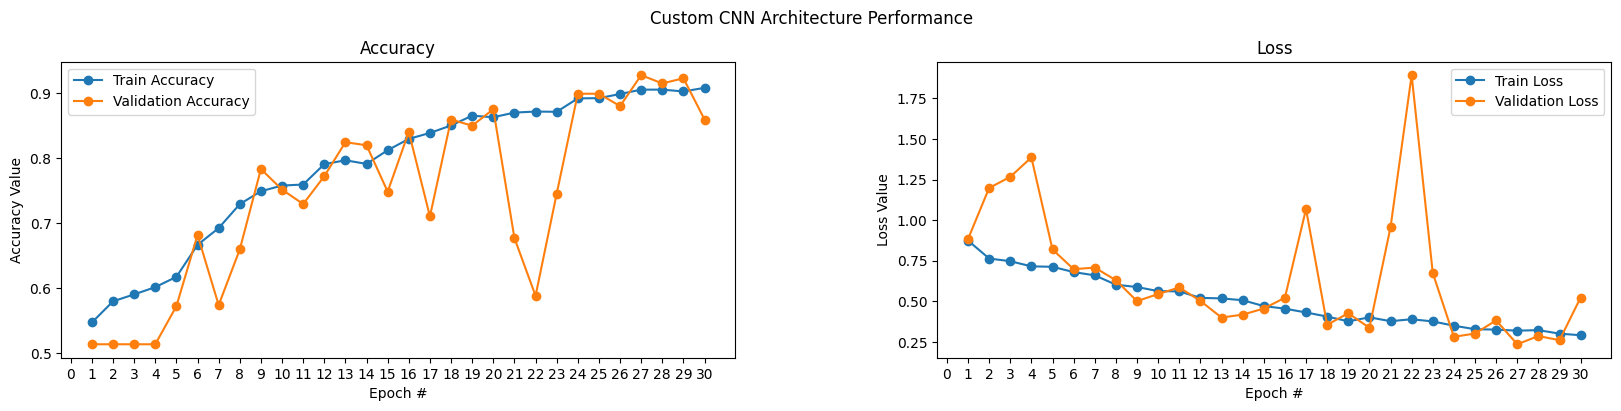

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the actual number of epochs the model trained for
EPOCHS_TRAINED = len(history.history['accuracy'])

# Create subplots for accuracy and loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Custom CNN Architecture Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

# Plot accuracy
epoch_list = list(range(1, EPOCHS_TRAINED+1))  # Update epoch_list to match the actual trained epochs
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy', marker='o')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
ax1.set_xticks(np.arange(0, EPOCHS_TRAINED+1, 1))  # Update x-axis ticks
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

# Plot loss
ax2.plot(epoch_list, history.history['loss'], label='Train Loss', marker='o')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss', marker='o')
ax2.set_xticks(np.arange(0, EPOCHS_TRAINED+1, 1))  # Update x-axis ticks
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Show the plots
plt.show()

In [ ]:
import cv2
import numpy as np

# Function to preprocess a single frame
def preprocess_frame(frame, target_size=(128, 128)):
    """
    Preprocess the frame: resize and normalize.
    """
    frame_resized = cv2.resize(frame, target_size)  # Resize to the input size of the model
    frame_normalized = frame_resized / 255.0  # Normalize the pixel values
    return np.expand_dims(frame_normalized, axis=0)  # Add batch dimension

# Function to predict on a single video
def predict_video(video_path, model, target_size=(128, 128), num_frames_to_sample=30):
    """
    Predict whether the video is real or fake by sampling frames and averaging predictions.
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []

    # Sample frames uniformly across the video
    frame_indices = np.linspace(0, frame_count - 1, num=num_frames_to_sample, dtype=int)

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)  # Set the video to the current frame index
        ret, frame = cap.read()
        if not ret:
            continue  # If frame can't be read, skip it
        processed_frame = preprocess_frame(frame, target_size)
        frames.append(processed_frame)

    cap.release()

    # Convert list of frames to a numpy array
    frames = np.vstack(frames)

    # Predict for each frame
    predictions = model.predict(frames)

    # Average the predictions to get the final prediction
    avg_prediction = np.mean(predictions, axis=0)

    # Return the final prediction: 1st output corresponds to 'real', 2nd to 'fake'
    return "Fake" if avg_prediction[1] > avg_prediction[0] else "Real", avg_prediction

# Path to the video file
video_path = '/content/v31.mp4'  # Replace with the path to the video you want to predict

# Use the current model (model2) for prediction
prediction, avg_prediction = predict_video(video_path, model2)
print(f"The video is predicted as: {prediction}")
print(f"Prediction scores: {avg_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The video is predicted as: Real
Prediction scores: [0.7310907 0.2963996]


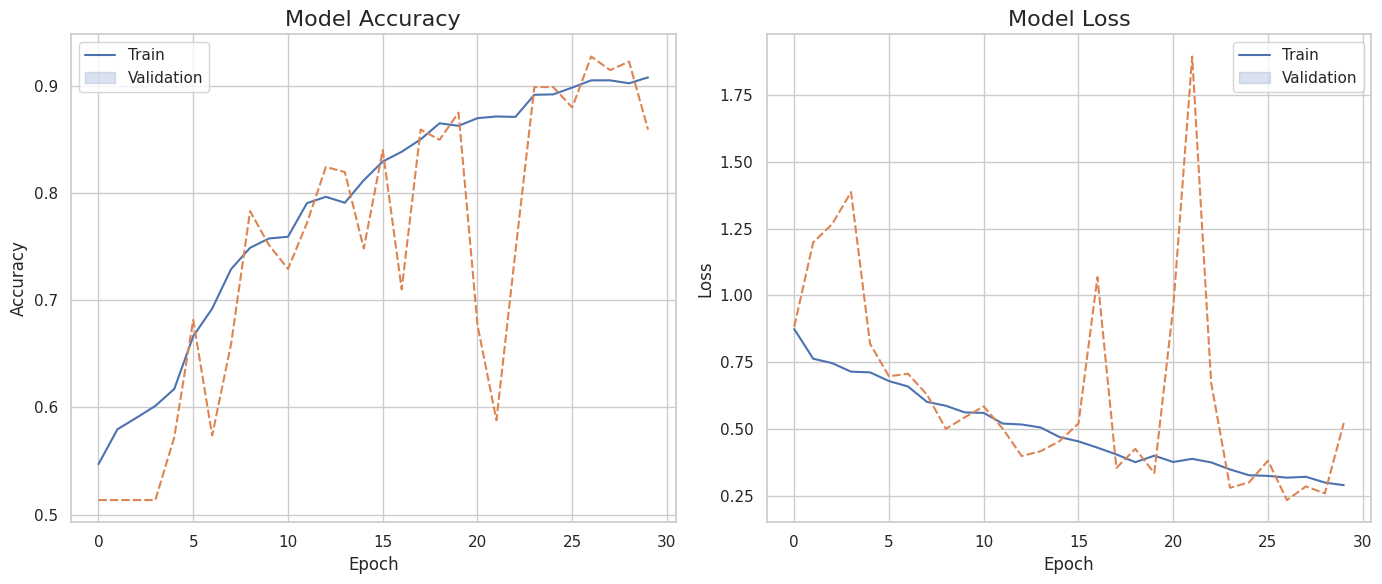

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_model_performance(history):
    # Convert history to a dataframe for easier plotting
    import pandas as pd
    history_df = pd.DataFrame(history.history)

    # Set the style and color palette
    sns.set(style="whitegrid")

    # Create a figure for plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot training & validation accuracy
    sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax1)
    ax1.set_title('Model Accuracy', fontsize=16)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend(['Train', 'Validation'], loc='best')

    # Plot training & validation loss
    sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax2)
    ax2.set_title('Model Loss', fontsize=16)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(['Train', 'Validation'], loc='best')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Assuming `history` is the object returned by model.fit()
visualize_model_performance(history)


In [ ]:
# Save the model
model2.save('deepfake_detection_model.keras')
